In [3]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [4]:
from pathlib import Path
from glob import glob
from sklearn.metrics import confusion_matrix
import random
import pandas as pd
import numpy as np
import os
import shutil
import re
import seaborn as sns

In [5]:
path = Path(os.getcwd())/'/content/drive/My Drive/datas/'
path

PosixPath('/content/drive/My Drive/datas')

In [6]:
from fastai.vision import *
tfms = get_transforms(do_flip=True,flip_vert=True, max_rotate = 25) # FOR RESNET34 AND DENSENET121 MODELS.
#tfms = get_transforms(do_flip=True,flip_vert=True, max_rotate = 50) #FOR MOBILENET V2 MODEL.

In [8]:
data = ImageDataBunch.from_folder('/content/drive/My Drive/datas/', train = 'train', test='test', ds_tfms = tfms, bs=16, size = (384, 512))

In [10]:
data

ImageDataBunch;

Train: LabelList (2058 items)
x: ImageList
Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512)
y: CategoryList
cardboard,cardboard,cardboard,cardboard,cardboard
Path: /content/drive/My Drive/datas;

Valid: LabelList (648 items)
x: ImageList
Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512)
y: CategoryList
cardboard,cardboard,cardboard,cardboard,cardboard
Path: /content/drive/My Drive/datas;

Test: LabelList (644 items)
x: ImageList
Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512)
y: EmptyLabelList
,,,,
Path: /content/drive/My Drive/datas

In [11]:
print(data.classes)

['cardboard', 'compost', 'glass', 'metal', 'paper', 'plastic', 'trash']


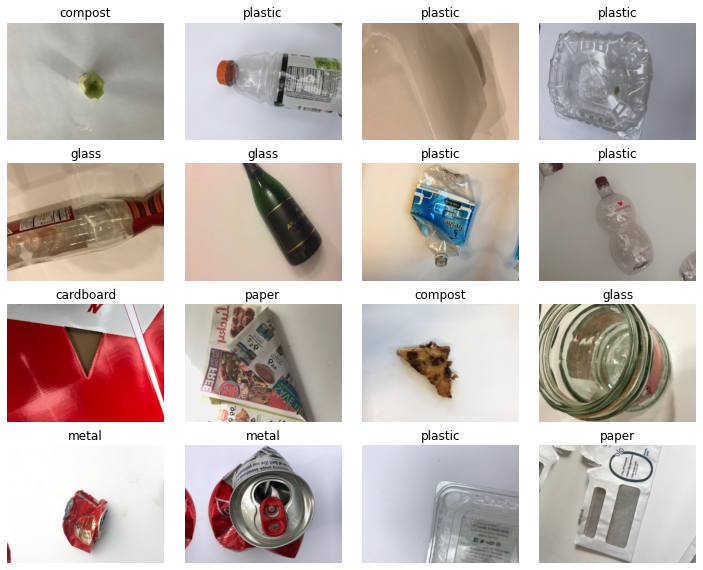

In [12]:
data.show_batch(rows=4,figsize=(10,8))

#LOAD EITHER OF THE MODELS MENTIONED BELOW PRETRAINED ON THE IMAGENET DATASET

In [18]:
learn = create_cnn(data,models.resnet34,metrics=accuracy)
#learn = create_cnn(data, models.densenet121, metrics = accuracy)
#learn = create_cnn(data, models.mobilenetv2, metrics = accuracy)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [ ]:
learn.model

###Finding most appropriate learning rate for optimum training by plotting lograithmic learning rate and plotting it against loss for one epoch over severak iterations.
###Best LR = One before exploding or converging.

In [20]:
learn.lr_find(start_lr=1e-6,end_lr=1e1)
learn.recorder.plot()

Exception: ignored

In [ ]:
#learn.load("/content/drive/MyDrive/datas/models/resnet34_96_point_27_rotation_25")

In [ ]:
learn.recorder.plot(suggestion = True)

#TRAINING THE MODEL =>


In [ ]:
learn.fit_one_cycle(60,max_lr=5.13E-03)

#LOAD MODEL =>

In [ ]:
#learn.load("/content/drive/My Drive/datas/models/mobilenet_v2_trash_96_point_27_max_rotate_50_60_epochs_max_lr_5_13E_03")

In [ ]:
import torch.quantization

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
gradcam_image = interp.GradCAM(0, ds_type=DatasetType.Test)

In [ ]:
sns.set(font_scale = 1.0)
interp.plot_top_losses(9, figsize=(15,11), heatmap = True)

In [ ]:
doc(interp.plot_top_losses)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
interp.most_confused(min_val=2)

In [ ]:
preds = learn.get_preds(ds_type=DatasetType.Test)

In [ ]:
print(preds[0].shape)
preds[0]

In [ ]:
data.classes

In [ ]:
## saves the index (0 to 5) of most likely (max) predicted class for each image
max_idxs = np.asarray(np.argmax(preds[0],axis=1))

yhat = []
for max_idx in max_idxs:
    yhat.append(data.classes[max_idx])

learn.data.test_ds[0][0]

In [ ]:
y = []

# Convert POSIX paths to string first
for label_path in data.test_ds.items:
    y.append(str(label_path))
    
# Extracting waste type from file path
pattern = re.compile("([a-z]+)[0-9]+")
for i in range(len(y)):
    y[i] = pattern.search(y[i]).group(1)

In [ ]:
# Predicted values
print(yhat[0:5])
# Actual values
print(y[0:5])

In [ ]:
learn.data.test_ds[0][0]

In [ ]:
cm = confusion_matrix(y,yhat)
print(cm)

In [ ]:
waste_types = ['cardboard', 'compost', 'glass','metal','paper','plastic','trash']
sns.set(font_scale = 1.0)
df_cm = pd.DataFrame(cm,waste_types,waste_types)

plt.figure(figsize=(10,8))
sns.heatmap(df_cm,annot=True,fmt="d",cmap="YlGnBu")

In [ ]:
correct = 0

for r in range(len(cm)):
    for c in range(len(cm)):
        if (r==c):
            correct += cm[r,c]

In [ ]:
accuracy = correct/sum(sum(cm))
accuracy * 100

#EXPORT TRAINED MODEL

In [ ]:
#learn.export("/content/drive/My Drive/mobilenet_v2_data_aug_rotation_50_trash_95_point_65217_acc_60max_lr_5_13E_03")

In [ ]:
#learn.save("/content/resnet_trash_96_point_27_max_rotate_50_60_epochs_max_lr_5_13E_03")

#LOADING TRAINED MODEL

In [ ]:
#learn.load("/content/resnet_trash_94_point_3_acc_60max_lr_5_13E_03")